 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from matplotlib import pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_return = pd.read_csv("./Resources/whale_returns.csv")

In [3]:
whale_return.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# to show null or NA values use df.isna()
whale_return.isna().head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [5]:
# Count nulls
whale_return.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_return = whale_return.dropna()

In [7]:
whale_return.isna().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [95]:
# convert type object to datetime
whale_return['Date'] = pd.to_datetime(whale_return['Date'])

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [96]:
# Reading algorithmic returns
algo_return = pd.read_csv("./Resources/algo_returns.csv")

In [10]:
# Count nulls
algo_return.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_return = algo_return.dropna()

In [12]:
# Count nulls
algo_return.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [13]:
# convert type object to datetime
algo_return['Date'] = pd.to_datetime(algo_return['Date'])

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("./Resources/sp500_history.csv")

In [15]:
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [16]:
# Check Data Types
#dtype = 'O' means Object
whale_return['Date'].dtype

dtype('<M8[ns]')

In [17]:
# Fix Data Types
sp500_history['Date'] = pd.to_datetime(sp500_history['Date'])

In [18]:
sp500_history['Date'].dtype

dtype('<M8[ns]')

In [19]:
#removing dollar sign
sp500_history['Close'].str.replace('$','',regex=False)

0       2933.68
1       2907.97
2       2905.03
3       2900.45
4       2907.06
         ...   
1644    1460.93
1645    1461.40
1646    1450.99
1647    1445.75
1648    1444.49
Name: Close, Length: 1649, dtype: object

In [20]:
closefix = sp500_history['Close'].str.replace('$','',regex=False)
closefix = closefix.astype('float')

In [21]:
sp500_history['Close'] = closefix

In [22]:
sp500_history.head()

,Date,Close
0,2019-04-23,2933.68
1,2019-04-22,2907.97
2,2019-04-18,2905.03
3,2019-04-17,2900.45
4,2019-04-16,2907.06


In [23]:
# Calculate Daily Returns
out = [0]
for i in range(len(sp500_history)-1):
    out.append((sp500_history['Close'][i+1]-sp500_history['Close'][i])/sp500_history['Close'][i])
#out.append(0)

In [24]:
sp500_history['Return'] = out

In [25]:
sp500_history.head()

,Date,Close,Return
0,2019-04-23,2933.68,0.000000
1,2019-04-22,2907.97,-0.008764
2,2019-04-18,2905.03,-0.001011
3,2019-04-17,2900.45,-0.001577
4,2019-04-16,2907.06,0.002279


In [26]:
sp500_daily_returns = sp500_history[['Date','Return']]

In [27]:
sp500_daily_returns['Date']

0      2019-04-23
1      2019-04-22
2      2019-04-18
3      2019-04-17
4      2019-04-16
          ...    
1644   2012-10-05
1645   2012-10-04
1646   2012-10-03
1647   2012-10-02
1648   2012-10-01
Name: Date, Length: 1649, dtype: datetime64[ns]

In [28]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [29]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Return": "S&P 500"})

In [30]:
# convert type object to datetime
sp500_daily_returns['Date'] = pd.to_datetime(sp500_daily_returns['Date'])

In [31]:
sp500_daily_returns['Date']

0      2019-04-23
1      2019-04-22
2      2019-04-18
3      2019-04-17
4      2019-04-16
          ...    
1644   2012-10-05
1645   2012-10-04
1646   2012-10-03
1647   2012-10-02
1648   2012-10-01
Name: Date, Length: 1649, dtype: datetime64[ns]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [32]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# combine whale_return with sp500
combine = whale_return.set_index('Date').join(sp500_daily_returns.set_index('Date'),on="Date")
# combine with the other one
combine = combine.join(algo_return.set_index('Date'),on="Date")

In [33]:
combine.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

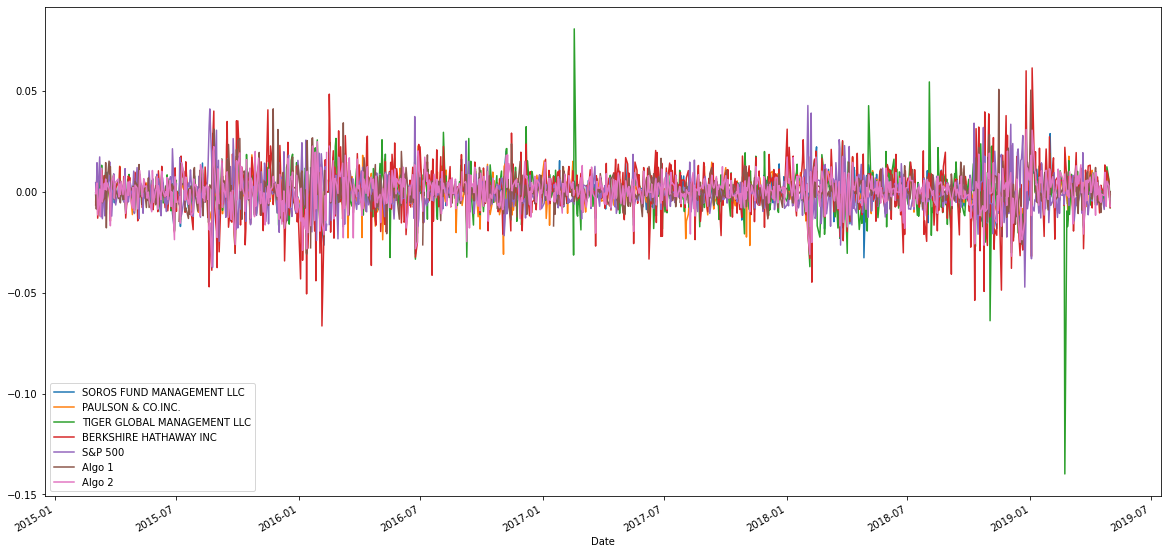

In [84]:
# Plot daily returns of all portfolios
combine.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

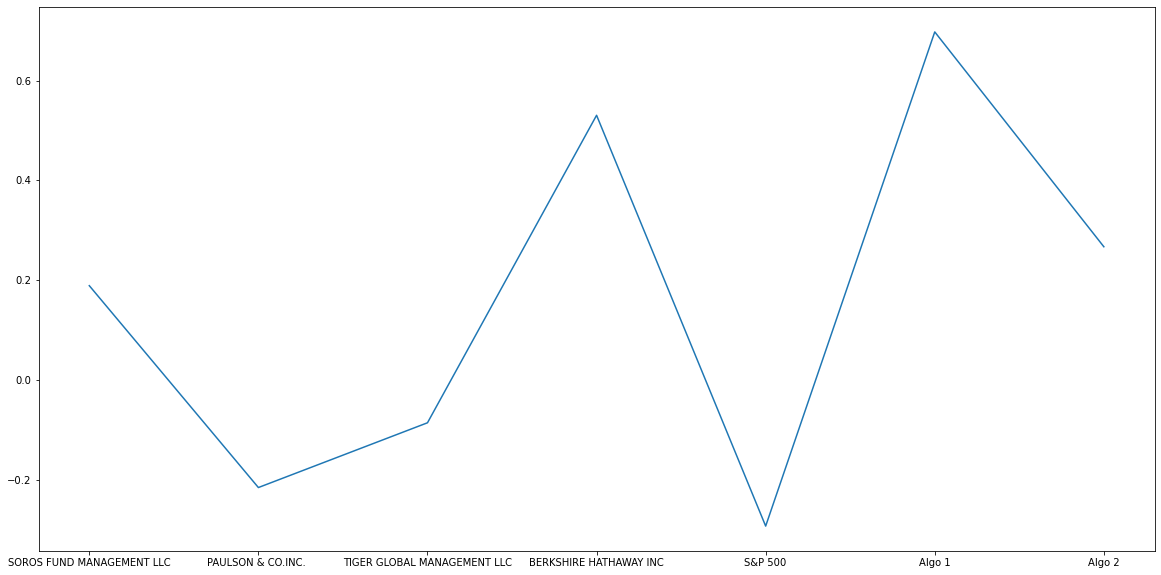

In [85]:
# Calculate cumulative returns of all portfolios
combine.sum()
# Plot cumulative returns
plt.figure(figsize=(20,10))
plt.plot(combine.sum())

---

In [36]:
## Risk Analysis

#Determine the _risk_ of each portfolio:

#1. Create a box plot for each portfolio. 
#2. Calculate the standard deviation for all portfolios
#4. Determine which portfolios are riskier than the S&P 500
#5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

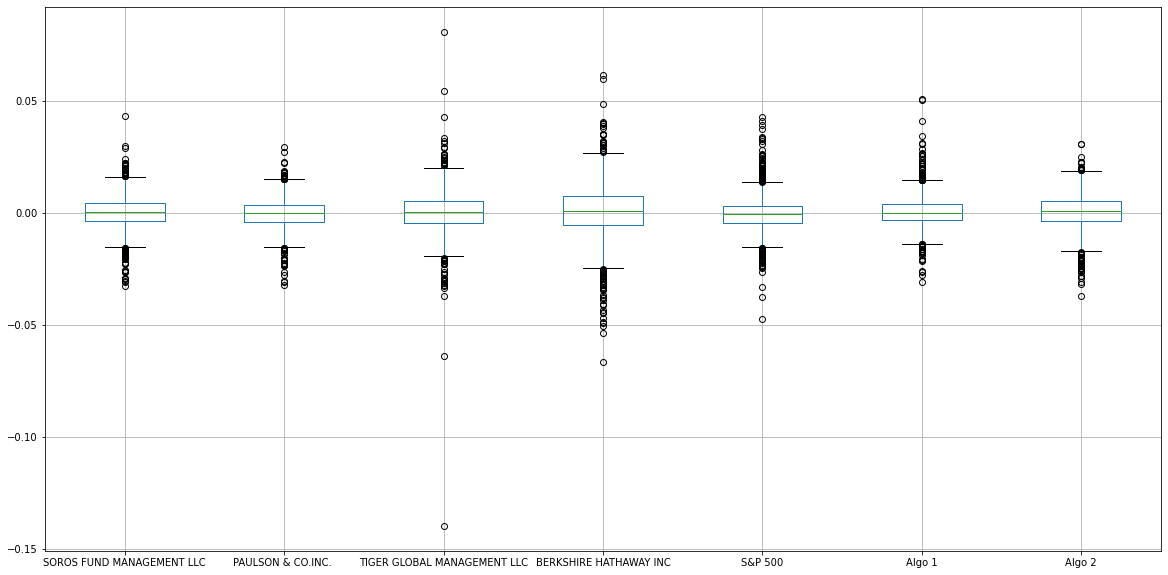

In [86]:
# Box plot to visually show risk
plt.figure(figsize=(20,10))
combine.boxplot()

### Calculate Standard Deviations

In [38]:
# Calculate the daily standard deviations of all portfolios
combine.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
S&P 500                        0.008583
Algo 1                         0.007601
Algo 2                         0.008327
dtype: float64

In [39]:
combine.std().index[0]

'SOROS FUND MANAGEMENT LLC'

### Determine which portfolios are riskier than the S&P 500

In [40]:
# Calculate  the daily standard deviation of S&P 500
snp500 = combine['S&P 500'].std()
# Determine which portfolios are riskier than the S&P 500
for i in range(len(combine.std())):
    if combine.std()[i] > snp500:
        print('The %s is riskier then S&P 500 by having Standard Diviation of %f' % (combine.std().index[i],combine.std()[i]))

The TIGER GLOBAL MANAGEMENT LLC is riskier then S&P 500 by having Standard Diviation of 0.010824
The BERKSHIRE HATHAWAY INC is riskier then S&P 500 by having Standard Diviation of 0.012831


### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized standard deviation (252 trading days)
combine.groupby(combine.index.year).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,0.007866,0.005917,0.008383,0.012592,0.010014,0.008920,0.008651
2016,0.007909,0.008165,0.010195,0.013901,0.008227,0.008366,0.009676
2017,0.004923,0.005912,0.008257,0.008533,0.004213,0.005220,0.005431
2018,0.009965,0.007484,0.012484,0.015265,0.010792,0.007548,0.009056
2019,0.007260,0.006919,0.017593,0.012481,0.007799,0.007715,0.007696


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

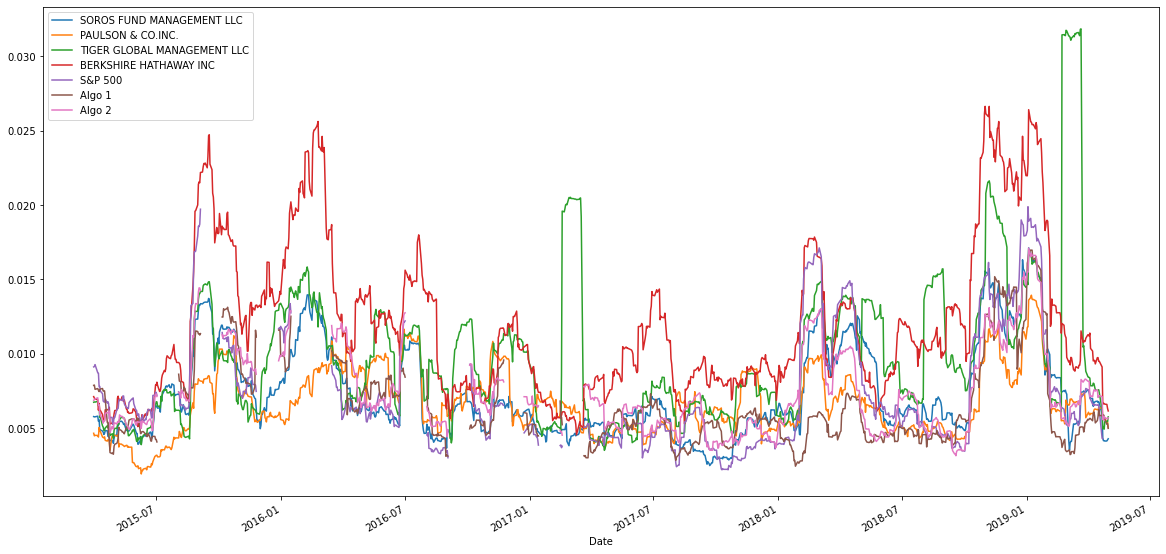

In [91]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combine.rolling(21).std()
# Plot the rolling standard deviation
combine.rolling(21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [43]:
# Calculate the correlation
corrMatrix = combine.corr()
# Display de correlation matrix
corrMatrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.000601,0.321366,0.826719
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.013564,0.269257,0.677993
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,-0.001486,0.164840,0.508139
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,-0.013819,0.292307,0.687717
S&P 500,0.000601,0.013564,-0.001486,-0.013819,1.000000,-0.033940,-0.002155
Algo 1,0.321366,0.269257,0.164840,0.292307,-0.033940,1.000000,0.288367
Algo 2,0.826719,0.677993,0.508139,0.687717,-0.002155,0.288367,1.000000


In [97]:
combine.rolling(60).cov()

SOROS FUND MANAGEMENT LLC  \
Date                                                                
2015-03-03 SOROS FUND MANAGEMENT LLC                          NaN   
           PAULSON & CO.INC.                                  NaN   
           TIGER GLOBAL MANAGEMENT LLC                        NaN   
           BERKSHIRE HATHAWAY INC                             NaN   
           S&P 500                                            NaN   
...                                                           ...   
2019-05-01 TIGER GLOBAL MANAGEMENT LLC               2.904919e-05   
           BERKSHIRE HATHAWAY INC                    3.304036e-05   
           S&P 500                                            NaN   
           Algo 1                                   -6.317888e-08   
           Algo 2                                    2.776656e-05   

                                        PAULSON & CO.INC.   \
Date                                                         
2015-03-03 SOROS FUND MANAGEMENT LLC                   NaN   
           PAULSON & CO.INC.                           NaN   
           TIGER GLOBAL MANAGEMENT LLC                 NaN   
           BERKSHIRE HATHAWAY INC                      NaN   
           S&P 500                                     NaN   
...                                                    ...   
2019-05-01 TIGER GLOBAL MANAGEMENT LLC        1.896046e-05   
           BERKSHIRE HATHAWAY INC             1.899396e-05   
           S&P 500                                     NaN   
           Algo 1                            -7.396998e-07   
           Algo 2                             2.188425e-05   

                                        TIGER GLOBAL MANAGEMENT LLC  \
Date                                                                  
2015-03-03 SOROS FUND MANAGEMENT LLC                            NaN   
           PAULSON & CO.INC.                                    NaN   
           TIGER GLOBAL MANAGEMENT LLC                          NaN   
           BERKSHIRE HATHAWAY INC                               NaN   
           S&P 500                                              NaN   
...                                                             ...   
2019-05-01 TIGER GLOBAL MANAGEMENT LLC                     0.000384   
           BERKSHIRE HATHAWAY INC                         -0.000016   
           S&P 500                                              NaN   
           Algo 1                                         -0.000005   
           Algo 2                                          0.000006   

                                        BERKSHIRE HATHAWAY INC  S&P 500  \
Date                                                                      
2015-03-03 SOROS FUND MANAGEMENT LLC                       NaN      NaN   
           PAULSON & CO.INC.                               NaN      NaN   
           TIGER GLOBAL MANAGEMENT LLC                     NaN      NaN   
           BERKSHIRE HATHAWAY INC                          NaN      NaN   
           S&P 500                                         NaN      NaN   
...                                                        ...      ...   
2019-05-01 TIGER GLOBAL MANAGEMENT LLC               -0.000016      NaN   
           BERKSHIRE HATHAWAY INC                     0.000084      NaN   
           S&P 500                                         NaN      NaN   
           Algo 1                                     0.000004      NaN   
           Algo 2                                     0.000036      NaN   

                                          Algo 1    Algo 2  
Date                                                        
2015-03-03 SOROS FUND MANAGEMENT LLC         NaN       NaN  
           PAULSON & CO.INC.                 NaN       NaN  
           TIGER GLOBAL MANAGEMENT LLC       NaN       NaN  
           BERKSHIRE HATHAWAY INC            NaN       NaN  
           S&P 500                           NaN       NaN  
...     

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

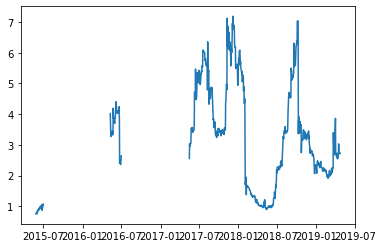

In [45]:
# Calculate covariance of a single portfolio
covariance = combine['BERKSHIRE HATHAWAY INC'].rolling(60).cov()
# Calculate variance of S&P 500
var = combine['S&P 500'].rolling(60).var()
# Computing beta
beta = covariance/var
# Plot beta trend
plt.plot(beta)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [46]:
# Use `ewm` to calculate the rolling window
combine.ewm(halflife=21).mean().head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,0.001560,-0.005320,0.000761
2015-03-05,0.001718,0.000878,-0.000193,0.001603,0.005975,-0.003817,0.001988
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,0.003375,-0.004116,-0.001542
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,0.006337,-0.004400,-0.000935
2015-03-10,-0.002274,-0.000414,-0.002688,-0.003503,0.005539,-0.003856,-0.002963
2015-03-11,-0.001284,0.000464,-0.001744,-0.003132,0.002709,-0.002778,-0.002401
2015-03-12,0.000052,0.001836,0.000335,-0.001183,0.003185,-0.002800,-0.000433
2015-03-13,-0.000270,0.001424,-0.000174,-0.002062,0.001095,-0.003132,-0.001018


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
combine.groupby(combine.index.year).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,0.000017,-0.000094,0.000162,0.000236,0.000268,1.029276e-03,-0.000283
2016,0.000004,-0.000460,0.001007,-0.000376,-0.000422,6.558460e-04,0.000474
2017,0.000544,-0.000268,0.000031,0.001618,-0.000697,6.785893e-07,0.000615
2018,-0.000567,-0.000442,-0.001444,-0.000429,0.000342,6.396733e-04,-0.000566
2019,0.002278,0.001232,-0.000295,0.003310,-0.001993,1.845238e-03,0.002355


In [48]:
combine.groupby(combine.index.year).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,0.007866,0.005917,0.008383,0.012592,0.010014,0.008920,0.008651
2016,0.007909,0.008165,0.010195,0.013901,0.008227,0.008366,0.009676
2017,0.004923,0.005912,0.008257,0.008533,0.004213,0.005220,0.005431
2018,0.009965,0.007484,0.012484,0.015265,0.010792,0.007548,0.009056
2019,0.007260,0.006919,0.017593,0.012481,0.007799,0.007715,0.007696


In [49]:
# Annualized Sharpe Ratios
annual_sharpe_ratios = combine.groupby(combine.index.year).mean()/combine.groupby(combine.index.year).std()

In [50]:
annual_sharpe_ratios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,0.002136,-0.015889,0.019312,0.018780,0.026727,0.115387,-0.032766
2016,0.000496,-0.056357,0.098800,-0.027066,-0.051345,0.078398,0.049021
2017,0.110543,-0.045378,0.003804,0.189615,-0.165521,0.000130,0.113206
2018,-0.056871,-0.059078,-0.115708,-0.028136,0.031716,0.084747,-0.062537
2019,0.313816,0.178022,-0.016742,0.265171,-0.255577,0.239171,0.306052


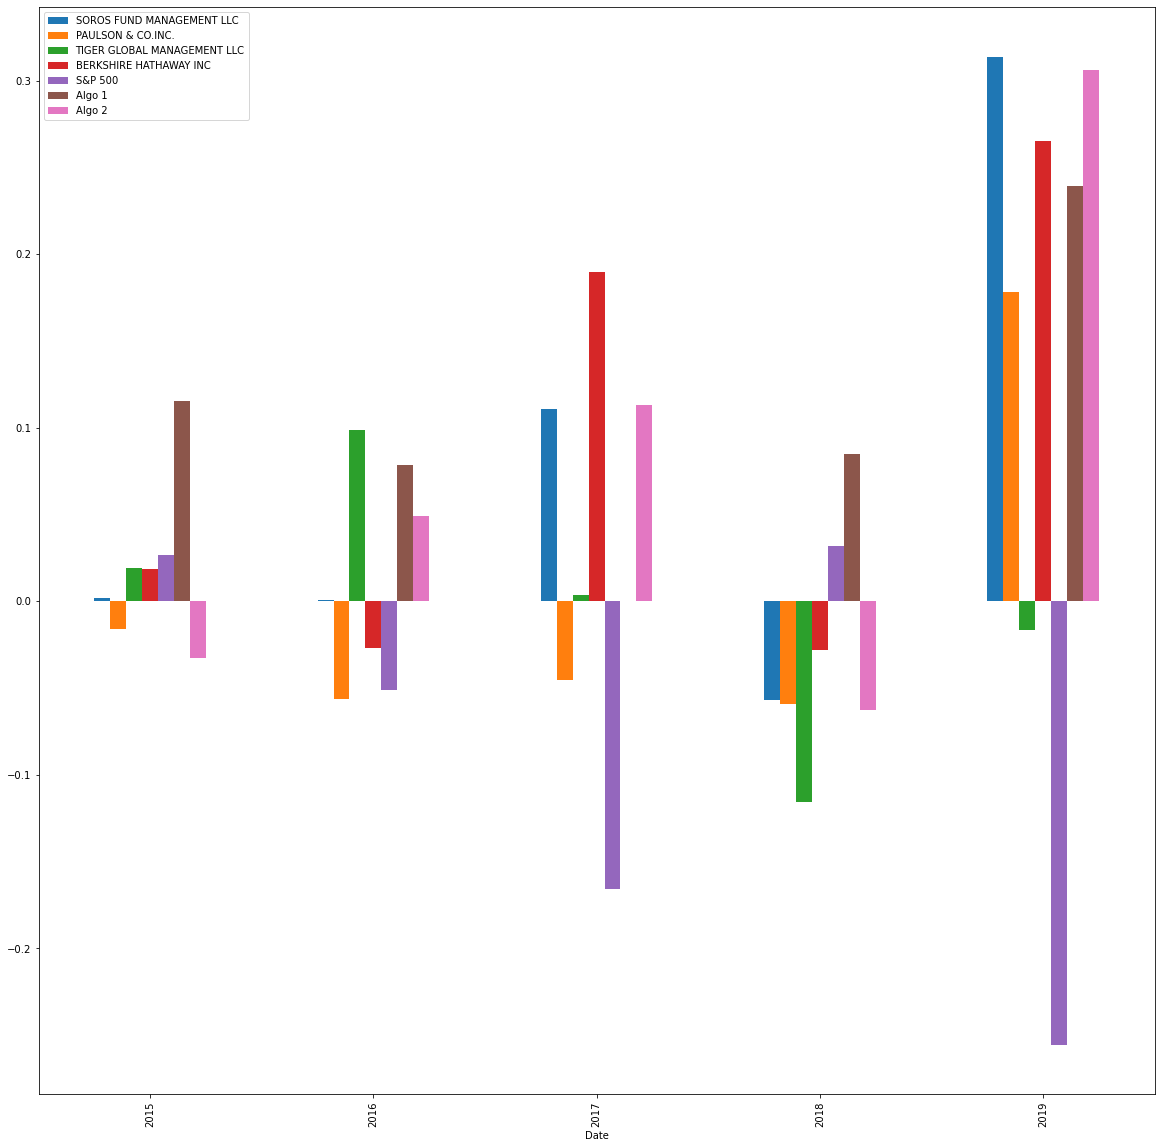

In [51]:
# Visualize the sharpe ratios as a bar plot
ax = annual_sharpe_ratios.plot.bar(figsize=(20,20))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the analysis done for the 5 years, Algorithmic Strategies has shown to steadily outperform S&P 500 and Whale Portfolios. Algorithmic strategies has and overall better sharpe ratio, standard deviation, and risk/return distribution. Thus while Whale Portfolios performs well, from a high risk high return perspective, the returns can at times be inconsistent. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [52]:
# Reading data from 1st stock
goog = pd.read_csv("./Resources/goog_historical.csv")

In [53]:
goog.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [54]:
# Reading data from 2nd stock
aapl = pd.read_csv("./Resources/aapl_historical.csv")

In [55]:
aapl.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [56]:
# Reading data from 3rd stock
cost = pd.read_csv("./Resources/cost_historical.csv")

In [57]:
cost.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [58]:
goog['Trade DATE']

0       5/9/2019
1       5/8/2019
2       5/7/2019
3       5/6/2019
4       5/3/2019
         ...    
245    5/17/2018
246    5/16/2018
247    5/15/2018
248    5/14/2018
249    5/11/2018
Name: Trade DATE, Length: 250, dtype: object

In [59]:
aapl['Trade DATE']

0       5/9/2019
1       5/8/2019
2       5/7/2019
3       5/6/2019
4       5/3/2019
         ...    
245    5/17/2018
246    5/16/2018
247    5/15/2018
248    5/14/2018
249    5/11/2018
Name: Trade DATE, Length: 250, dtype: object

In [60]:
cost['Trade DATE']

0       5/9/2019
1       5/8/2019
2       5/7/2019
3       5/6/2019
4       5/3/2019
         ...    
245    5/17/2018
246    5/16/2018
247    5/15/2018
248    5/14/2018
249    5/11/2018
Name: Trade DATE, Length: 250, dtype: object

In [61]:
goog['Trade DATE'] = pd.to_datetime(goog['Trade DATE'])
aapl['Trade DATE'] = pd.to_datetime(aapl['Trade DATE'])
cost['Trade DATE'] = pd.to_datetime(cost['Trade DATE'])

In [62]:
# Combine all stocks in a single DataFrame
combine2 = goog.merge(cost,on='Trade DATE',copy=False)
combine2 = combine2.merge(aapl,on='Trade DATE',copy=False)

In [63]:
# Reset Date index
combine2 = combine2.set_index("Trade DATE")

In [64]:
# Reorganize portfolio data by having a column per symbol
combine2 = combine2.rename(columns={"NOCP_x": "Google NOCP","NOCP_y":"Costco NOCP","NOCP":"Apple NOCP"})
combine2 = combine2.drop(labels=["Symbol_x","Symbol_y","Symbol"],axis=1)

In [65]:
combine2.head()

,Google NOCP,Costco NOCP,Apple NOCP
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75


In [66]:
len(combine2)

250

In [67]:
# Calculate Daily Returns
goog_dr = [0]
cost_dr = [0]
aapl_dr = [0]
for i in range(len(combine2)-1):
    goog_dr.append((combine2['Google NOCP'][i+1]-combine2['Google NOCP'][i])/combine2['Google NOCP'][i])
    cost_dr.append((combine2['Costco NOCP'][i+1]-combine2['Costco NOCP'][i])/combine2['Costco NOCP'][i])
    aapl_dr.append((combine2['Apple NOCP'][i+1]-combine2['Apple NOCP'][i])/combine2['Apple NOCP'][i])

In [68]:
combine2['google return'] = goog_dr
combine2['costco return'] = cost_dr
combine2['apple return'] = aapl_dr

In [69]:
# Drop NAs
combine2 = combine2.dropna()

In [70]:
# Display sample data
combine2.head()

,Google NOCP,Costco NOCP,Apple NOCP,google return,costco return,apple return
Trade DATE,,,,,,
2019-05-09,1162.38,243.47,200.72,0.000000,0.000000,0.000000
2019-05-08,1166.27,241.34,202.90,0.003347,-0.008749,0.010861
2019-05-07,1174.10,240.18,202.86,0.006714,-0.004806,-0.000197
2019-05-06,1189.39,244.23,208.48,0.013023,0.016862,0.027704
2019-05-03,1185.40,244.62,211.75,-0.003355,0.001597,0.015685


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [71]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = combine2['google return']*weights[0]+combine2['costco return']*weights[1]+combine2['apple return']*weights[2]
# Display sample data
portfolio_return.head()

Trade DATE
2019-05-09    0.000000
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [72]:
# Join your returns DataFrame to the original returns DataFrame
combine3 = combine2[['google return','apple return','costco return']].merge(portfolio_return.rename('portfolio return'),on=combine2.index)

In [73]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine3.isna().sum()

key_0               0
google return       0
apple return        0
costco return       0
portfolio return    0
dtype: int64

In [74]:
combine3 = combine3.rename(columns={"key_0":"Date"})
combine3['Date'] = pd.to_datetime(combine3['Date'])

In [75]:
combine3 = combine3.set_index('Date')

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized `std`
combine3.groupby(combine2.index.year).std()

,google return,apple return,costco return,portfolio return
Trade DATE,,,,
2018,0.017105,0.018645,0.014891,0.013942
2019,0.015930,0.019174,0.010194,0.012094


### Calculate and plot rolling `std` with 21-day window

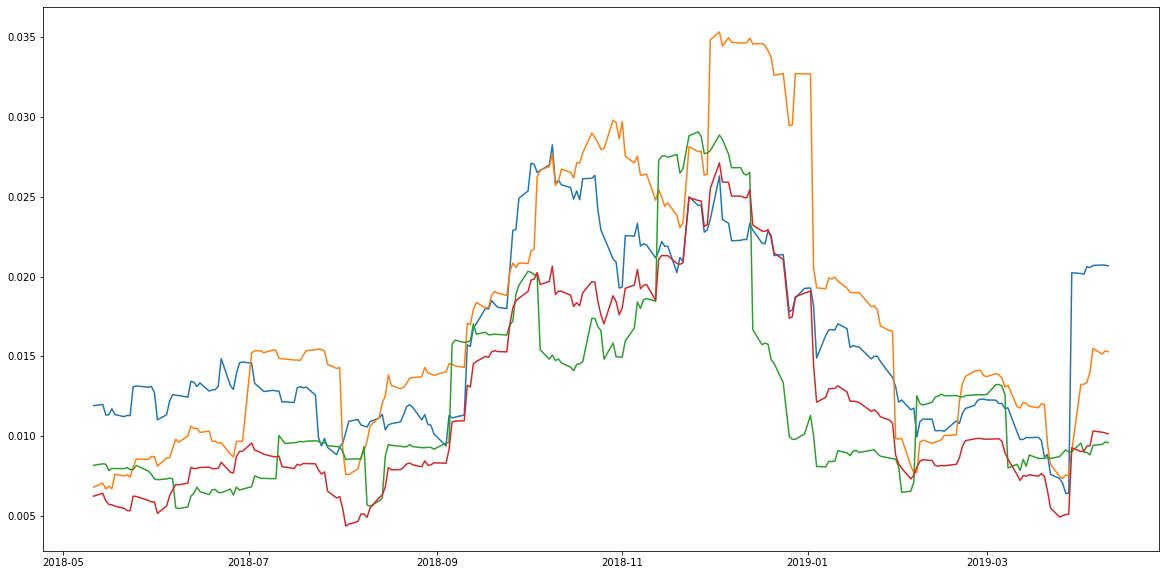

In [77]:
# Calculate rolling standard deviation
combine3.rolling(21).std()
# Plot rolling standard deviation
plt.figure(figsize=(20,10))
plt.plot(combine3.rolling(21).std())

plt.show()

### Calculate and plot the correlation

In [78]:
# Calculate and plot the correlation
combine3.corr()

,google return,apple return,costco return,portfolio return
google return,1.000000,0.648156,0.375227,0.848645
apple return,0.648156,1.000000,0.413962,0.881017
costco return,0.375227,0.413962,1.000000,0.687074
portfolio return,0.848645,0.881017,0.687074,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [79]:
# Calculate and plot Beta

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [98]:
# Calculate Annualzied Sharpe Ratios
annual_sharpe_ratios2 = combine3.groupby(combine3.index.year).mean()/combine3.groupby(combine2.index.year).std()

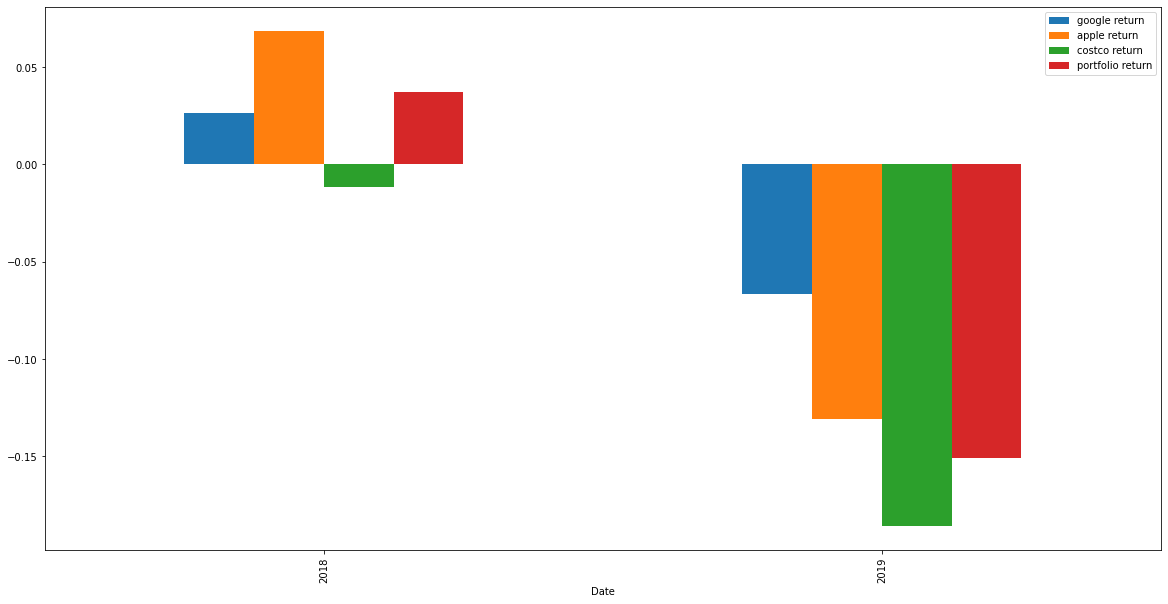

In [99]:
# Visualize the sharpe ratios as a bar plot
ax = annual_sharpe_ratios2.plot.bar(figsize=(20,10))

### How does your portfolio do?

Based on the stock prices in 2019, returns analysis, standard deviation, and sharpe ratio, this portfolio does not look like it's doing well. Idealy we would look for a sharpe ratio closer to 1 and smaller standard deviations for a good portfolio. I would include some additional assets that have a different correlation to these particular stock for a more rounded risk averse  portfolio. 